In [1]:
using ShipMMG

using Plots
using LaTeXStrings

┌ Info: Precompiling ShipMMG [37f2b0bf-0c13-4883-8808-e75eb56597e7]
└ @ Base loading.jl:1260


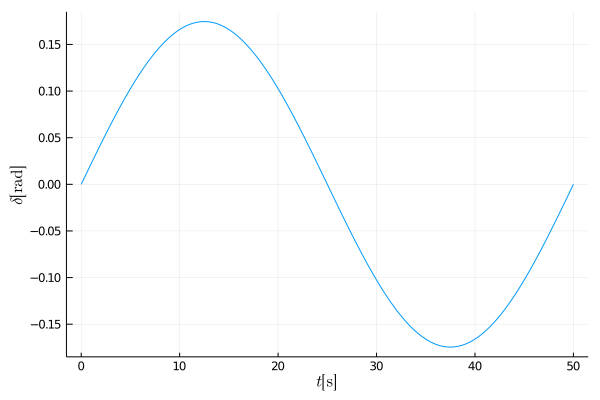

In [2]:
K_log = 0.155  # [1/s]
T_log = 80.5  # [s]
u0 = 10 * (1852.0 / 3600)  # [m/s] (knot * 1852/3600)
duration = 50  # [s]
sampling = 10000
time_list = range(0.0,stop=duration,length=sampling)
Ts = 50.0
δ_list = 10.0 * pi / 180.0  * sin.(2.0 * pi / Ts * time_list) # [rad]


plot(time_list, δ_list, xlabel = L"t \textrm{[s]}", ylabel=L"\delta \textrm{[rad]}", label="")

In [3]:
# @time sol=kt_simulate(time_list, δ_list, K_log, T_log, u0);

@time time, x, y, ψ, u, r, δ = kt_simulate(time_list, δ_list, K_log, T_log, u0);

  3.671567 seconds (13.94 M allocations: 691.950 MiB, 4.13% gc time)


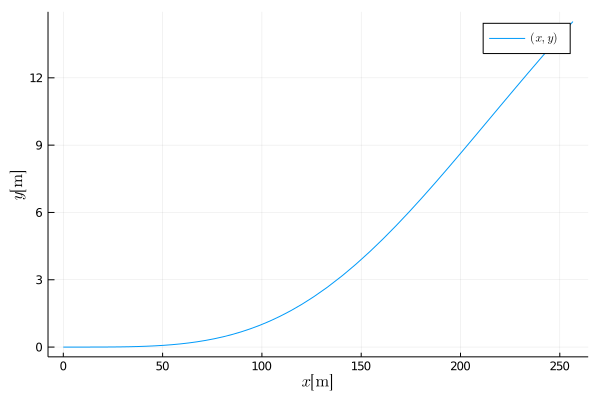

In [4]:
plot(x,y,label=L"(x,y)",xlabel=L"x \textrm{[m]}",ylabel=L"y \textrm{[m]}")

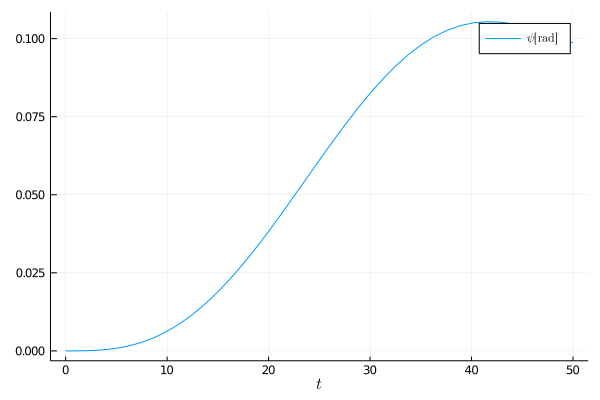

In [5]:
plot(time, ψ, xlabel=L"t", label=L"\psi \textrm{[rad]}")

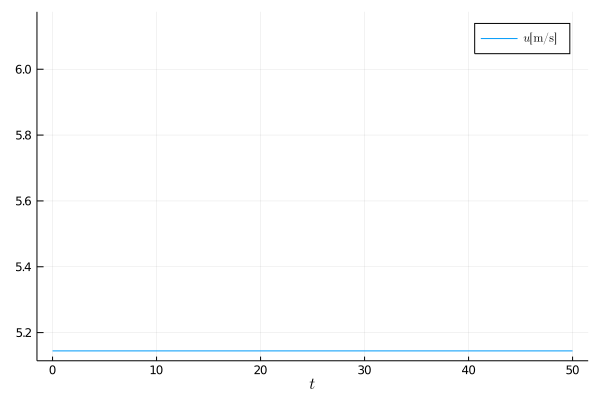

In [6]:
plot(time, u, xlabel=L"t", label=L"u \textrm{[m/s]}")

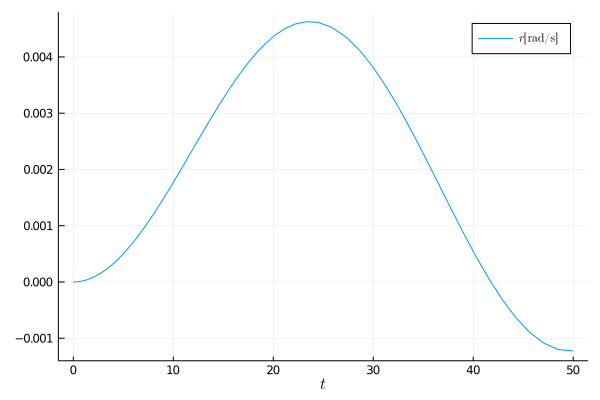

In [7]:
plot(time, r, xlabel=L"t", label=L"r \textrm{[rad/s]}")

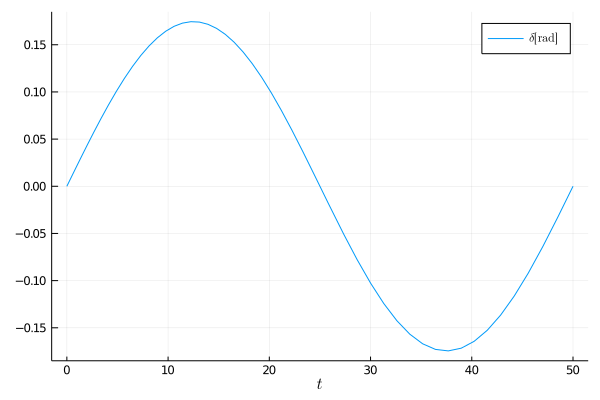

In [8]:
plot(time, δ, xlabel=L"t", label=L"\delta \textrm{[rad]}")

┌ Info: Saved animation to 
│   fn = /home/mitsuyuki/Documents/workspace/ShipMMG/example/test.gif
└ @ Plots /home/mitsuyuki/.julia/packages/Plots/4EfKl/src/animation.jl:104


Plots.AnimatedGif("/home/mitsuyuki/Documents/workspace/ShipMMG/example/test.gif")
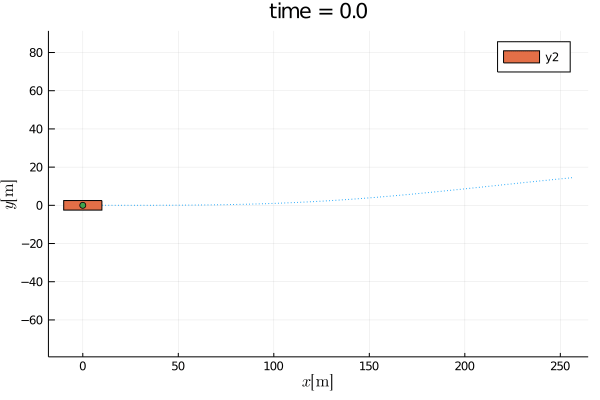

In [16]:
draw_gif_result(time, x, y, ψ,"test.gif")

## square(x[2], y[2], [20,5], ψ[2])

┌ Info: Saved animation to 
│   fn = /home/mitsuyuki/Documents/workspace/ShipMMG/example/time.gif
└ @ Plots /home/mitsuyuki/.julia/packages/Plots/4EfKl/src/animation.jl:104


Plots.AnimatedGif("/home/mitsuyuki/Documents/workspace/ShipMMG/example/time.gif")
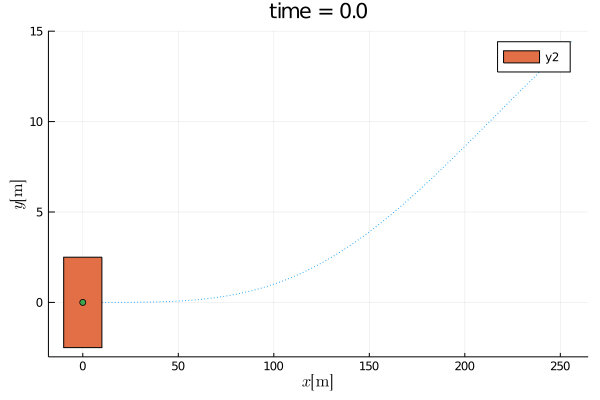

In [11]:
anim = @animate for i in 1:length(time)
    plot(x, y, label="", xlabel=L"x \textrm{[m]}", ylabel=L"y \textrm{[m]}", linestyle = :dot)
    sd = square(x[i], y[i], [20,5], ψ[i])
    plot!(Shape(sd[1], sd[2]))
    scatter!([x[i]], [y[i]], seriestype = :scatter, title="time = $(time[i])", label="")
end
gif(anim, "time.gif", fps=5)

In [12]:
shape = [4,2]

2-element Array{Int64,1}:
 4
 2

In [13]:
square_xy = [
            [shape[1], shape[2]],
            [-shape[1], shape[2]],
            [-shape[1], -shape[2]],
            [shape[1], -shape[2]],
            [shape[1], shape[2]],
        ]
square_xy/2

5-element Array{Array{Float64,1},1}:
 [2.0, 1.0]
 [-2.0, 1.0]
 [-2.0, -1.0]
 [2.0, -1.0]
 [2.0, 1.0]

In [14]:

angle = deg2rad(90)
rotate_matrix = [cos(angle) -sin(angle) ; sin(angle) cos(angle)]

2×2 Array{Float64,2}:
 6.12323e-17  -1.0
 1.0           6.12323e-17

In [15]:
xy = [
    rotate_pos([shape[1], shape[2]]/2,deg2rad(90))+[1,0],
    rotate_pos([-shape[1], shape[2]]/2,deg2rad(90))+[1,0],
    rotate_pos([-shape[1], -shape[2]]/2,deg2rad(90))+[1,0],
    rotate_pos([shape[1], -shape[2]]/2,deg2rad(90))+[1,0],
]
hxy = hcat(xy...)
hxy[1,:]

4-element Array{Float64,1}:
  1.1102230246251565e-16
 -2.220446049250313e-16
  2.0
  2.0